<h3>1. Instruções</h3>
<ol>
<li>Importe as bibliotecas pandas e sqlite3.</li>
<li>Conecte-se ao database <b>factbook.db</b> e use o <i>pandas.read_sql_query()</i> para retornar as informações da tabelas do database.</li>
<li>Escreva e execute uma query que retorne as 5 primeiras linhas da tabela <b>facts</b> do database.</li>
</ol>

In [1]:
import pandas as pd
import sqlite3

In [6]:
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
cursor.execute(q1).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [7]:
pd.read_sql_query(q1,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [10]:
q2 = "select * from facts limit 5;"
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


<h3>2. Instruções</h3>
<ol>
<li>Escreva apenas uma query que retorne:</li>
<ul>
<li>O mínimo da população</li>
<li>O máximo da população</li>
<li>O mínimo do crescimento da população</li>
<li>O máximo do crescimento da população</li>
</ul>
</ol>

In [14]:
q3 = "select min(population) as pop_min, max(population) as pop_max, min(population_growth) as growth_pop_min, max(population_growth) as growth_pop_max from facts;"
pd.read_sql_query(q3,conn)

,pop_min,pop_max,growth_pop_min,growth_pop_max
0,0,7256490011,0.0,4.02


<h3>3. Instruções</h3>
<ol>
<li>Escreva apenas uma query que retorne os páises com a população igual <b>0</b>.</li>
<li>Escreva apenas uma query que retorne os páises com a população igual <b>7256490011.</b></li>
<li>Escreva uma observação sobre estas linhas.</li>
</ol>

In [16]:
q4 = "select * from facts where population == (select min(population) from facts);"
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [17]:
q5 = "select * from facts where population == (select max(population) from facts);"
pd.read_sql_query(q5,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


<p>O valor fornecido referente Antartica que apenas possui população sanzional de centros de pesquisas, pode ser por este motivo o valor da população é igual a zero.<br>
Enquanto a população 7.256.490.011	de habitantes se refere a população total da Terra.</p>

<h3>4. Instrução</h3>
<ol>
<li>Usando apenas as linhas não externas, gere uma grade 2 por 2 de histogramas para as seguintes colunas: </li>
<ul>
<li>population</li>
<li>population_growth</li>
<li>birth_rate</li>
<li>death_rate</li>
</ul>
</ol>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb29fdd69b0>,
      dtype=object)

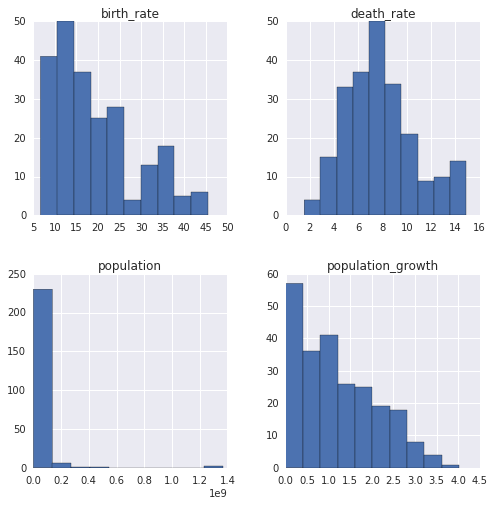

In [22]:
q6 = "select population, population_growth, birth_rate, death_rate from facts where population != (select max(population) from facts) and population != (select min(population) from facts);"
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
pd.read_sql_query(q6,conn).hist(ax=ax)

<h3>5. Instruções</h3>
<ol>
<li>Aqui alguns passos para seguir para explorar o database:</li>
<ul>
<li>Quais países com a maior densidade populacional?<br>Obs:A densidade populacional é a razão entre população e área de terra. Compare seus resultados com os da Wikipedia.</li>
<li>Gere um histograma da densidade populacional.</li>
<li>Quais países têm as maiores proporções de água para terra? Quais países têm mais água que terra?</li>
</ul>
</ol>

<h4>Quais países com a maior densidade populacional?</h4>

In [39]:
q7 = '''select name as País, 
(cast(population as float) / cast(area_land as float)) as Densidade 
from facts order by Densidade desc limit 10;'''
pd.read_sql_query(q7,conn)

,País,Densidade
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


<h4>Densidade Populacional no Histograma</h4>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb29f890470>],
      dtype=object)

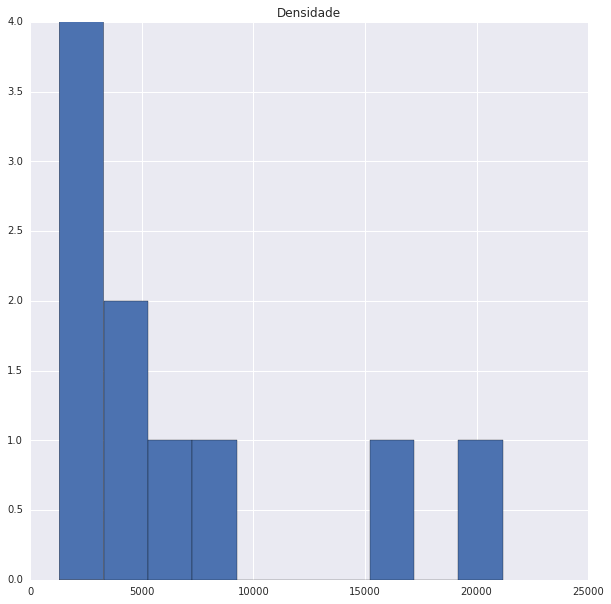

In [51]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pd.read_sql_query(q7,conn).hist(ax=ax)

<h4>Quais países têm as maiores proporções de água para terra?</h4>

In [57]:
q8 = '''select name as País, 
(cast(area_water as float) / cast(area_land as float)) as Porporção_de_Água 
from facts order by Porporção_de_Água desc limit 10;'''
pd.read_sql_query(q8,conn)

,País,Porporção_de_Água
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


<h4>Quais países têm mais água que terra?</h4>

In [55]:
q9 = '''select name as País, area_water Quantidade_de_Água
from facts order by  Quantidade_de_Água desc limit 10;'''
pd.read_sql_query(q9,conn)

,País,Quantidade_de_Água
0,Canada,891163
1,Russia,720500
2,United States,664709
3,India,314070
4,China,270550
5,Brazil,157630
6,Iran,116600
7,Ethiopia,104300
8,Colombia,100210
9,Indonesia,93000
